### <a id='toc1_1_1_'></a>[Introduce](#toc0_)

Hello

**Table of contents**<a id='toc0_'></a>    
- [Introduce](#toc1_1_1_)    
    - [Loading libraries](#toc1_1_2_)    
    - [Loading data](#toc1_1_2_1_)    
    - [Preprocessing data for analysis](#toc1_1_3_)    
    - [Desctriptive statistics](#toc1_1_4_)    
    - [Stock price of Apple over the years](#toc1_1_5_)    
    - [Linear Regression](#toc1_1_5_1_)    
    - [Metrics of linear regression and conclusions](#toc1_1_5_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_2_'></a>[Loading libraries](#toc0_)

In [618]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import warnings

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from math import floor,ceil
from sklearn.linear_model import LinearRegression
from pmdarima.arima import auto_arima
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings("ignore")

#### <a id='toc1_1_2_1_'></a>[Loading data](#toc0_)

In [619]:
market = pd.read_csv("AAPL Historical Data.csv", decimal=",", parse_dates = ["Date"], index_col="Date")

### <a id='toc1_1_3_'></a>[Preprocessing data for analysis](#toc0_)

In [620]:
## Market first 10 rows
print(market.head(10))

## Market data frame shape
print(market.shape)

## Market data frame types
print(market.dtypes)

             Price    Open    High     Low    Vol. Change %
Date                                                       
2023-05-01  169.59  169.28  170.45  168.64  49.39M   -0.05%
2023-04-28  169.68  168.49  169.85  167.88  55.28M    0.75%
2023-04-27  168.41  165.19  168.56  165.19  64.22M    2.84%
2023-04-26  163.76  163.05  165.28  162.80  44.11M   -0.01%
2023-04-25  163.77  165.19  166.30  163.73  48.17M   -0.94%
2023-04-24  165.33  165.00  165.60  163.89  38.99M    0.19%
2023-04-21  165.02  165.05  166.45  164.49  58.34M   -0.98%
2023-04-20  166.65  166.09  167.87  165.56  52.46M   -0.58%
2023-04-19  167.63  165.80  168.16  165.54  47.24M    0.70%
2023-04-18  166.47  166.10  167.41  165.65  48.41M    0.75%
(2519, 6)
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object


In [621]:
### Changing col name "Vol." for better view
market = market.rename(columns = {"Vol.":"Vol"})

In [622]:
# Remove all letters in dataframe using regular expression expect dots.
market[["Price", "Open", "High", "Low"]] = market[["Price", "Open", "High", "Low"]].replace('[^0-9\.]+', '', regex=True)
## Unit M means milion

### Drop also change%
market = market.drop(columns = "Change %")

In [623]:
# Checking for missing values
print(market.isnull().sum().sort_values(ascending=False))

Vol      1
Price    0
Open     0
High     0
Low      0
dtype: int64


In [624]:
# Drop missing value
print(market[market["Vol"].isnull()])
market = market.dropna()

            Price   Open   High    Low  Vol
Date                                       
2016-02-27  96.95  96.95  96.95  96.95  NaN


In [625]:
print(market.isna().any())

Price    False
Open     False
High     False
Low      False
Vol      False
dtype: bool


In [626]:
print(market.head(10))

             Price    Open    High     Low     Vol
Date                                              
2023-05-01  169.59  169.28  170.45  168.64  49.39M
2023-04-28  169.68  168.49  169.85  167.88  55.28M
2023-04-27  168.41  165.19  168.56  165.19  64.22M
2023-04-26  163.76  163.05  165.28  162.80  44.11M
2023-04-25  163.77  165.19  166.30  163.73  48.17M
2023-04-24  165.33  165.00  165.60  163.89  38.99M
2023-04-21  165.02  165.05  166.45  164.49  58.34M
2023-04-20  166.65  166.09  167.87  165.56  52.46M
2023-04-19  167.63  165.80  168.16  165.54  47.24M
2023-04-18  166.47  166.10  167.41  165.65  48.41M


In [627]:
# Convert data 
market[["Price", "Open", "High", "Low"]] = market[["Price", "Open", "High", "Low"]].astype(float)
print(market.info())
print(market.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2023-05-01 to 2013-05-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2518 non-null   float64
 1   Open    2518 non-null   float64
 2   High    2518 non-null   float64
 3   Low     2518 non-null   float64
 4   Vol     2518 non-null   object 
dtypes: float64(4), object(1)
memory usage: 118.0+ KB
None
             Price    Open    High     Low     Vol
Date                                              
2023-05-01  169.59  169.28  170.45  168.64  49.39M
2023-04-28  169.68  168.49  169.85  167.88  55.28M
2023-04-27  168.41  165.19  168.56  165.19  64.22M
2023-04-26  163.76  163.05  165.28  162.80  44.11M
2023-04-25  163.77  165.19  166.30  163.73  48.17M


### <a id='toc1_1_4_'></a>[Desctriptive statistics](#toc0_)

In [628]:
print(round(market.describe(),2))

         Price     Open     High      Low
count  2518.00  2518.00  2518.00  2518.00
mean     66.83    66.78    67.54    66.06
std      50.48    50.43    51.09    49.81
min      14.06    13.98    14.30    13.89
25%      27.86    27.84    28.09    27.46
50%      43.26    43.30    43.70    42.96
75%     118.68   118.70   120.26   116.72
max     182.01   182.63   182.94   179.12


### <a id='toc1_1_5_'></a>[Stock price of Apple over the years](#toc0_)

Text(0.5, 1.0, 'Stock Prices of Apple over the Years')

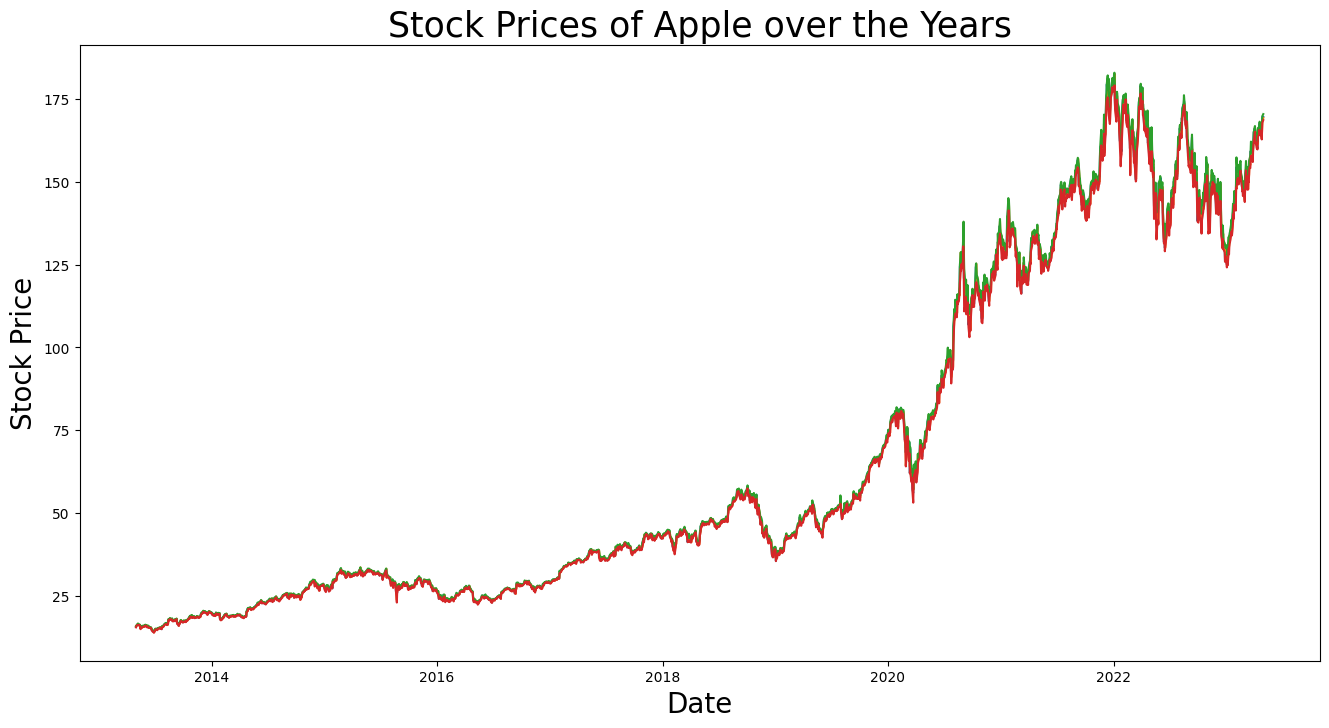

In [629]:

plt.figure(figsize=(16,8))
plt.plot(market[["Price", "Open", "High", "Low"]])
plt.xlabel("Date",size=20)
plt.ylabel("Stock Price",size=20)
plt.title("Stock Prices of Apple over the Years",size=25)


#### <a id='toc1_1_5_1_'></a>[Linear Regression](#toc0_)

In [630]:
#market = market.reset_index()
#market = market.sort_values("Date", ascending = True)

In [631]:
# market = market.reset_index()
# # Splitting the cols
# X = market["Date"]
# y = market["Price"]

# # Splitting data
# train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state = 0, shuffle = False)

# # Checking shapes
# print(train_X.shape, test_X.shape, train_y.shape, test_y.shape) 

# # Add to new data frames
# df_train = {"Date":train_X, "Price":train_y}
# df_train = pd.DataFrame(df_train)

# df_test = {"Date":test_X, "Price":test_y}
# df_test = pd.DataFrame(df_test)


# # To maths representive calendar
# train_X = train_X.map(dt.datetime.toordinal)
# test_X = test_X.map(dt.datetime.toordinal)

# # Model fitting
# model = LinearRegression()
# model.fit(np.array(train_X).reshape(-1,1), train_y)

# # Model predict
# preds = model.predict(np.array(test_X).reshape(-1,1))

# # Assigning prediction
# df_test["Predictions"] = preds

# # Setting indexes
# df_train.index = df_train["Date"]
# df_test.index = df_test["Date"]

# # Drop unnecessary columns
# df_train = df_train.drop(columns = "Date")
# df_test = df_test.drop(columns= "Date")

# # Sorting by dates
# df_train = df_train.sort_values("Date", ascending = False)
# df_test = df_test.sort_values("Date", ascending = False)

# print(df_test)
# print(df_train)


# # Plot
# plt.plot(df_train["Price"])
# plt.plot(df_test[["Price", "Predictions"]], linestyle = "--")
# plt.xlabel("Date",size=20)
# plt.ylabel("Stock Price",size=20)
# plt.title("Stock Price Prediction by Linear Regression",size=20)
# plt.legend(["Model Training Data","Actual Data","Predicted Data"])
#plt.xticks(rotation = 45)
#plt.xlim(df_train.index.min(), df_test.index.max())

#### <a id='toc1_1_5_2_'></a>[Metrics of linear regression and conclusions](#toc0_)

In [632]:
#Metrics

# mse = mean_squared_error(test_y, preds)
# rmse = np.sqrt(mse)
# r2 = r2_score(test_y, preds)

# print(100*"-")
# print("\n") 
# print(f'Mean Squared Error: {mse}')
# print("\n")
# print(100*"-")
# print("\n")
# print(f'Root Mean Squared Error: {rmse}')
# print("\n")
# print(100*"-")
# print("\n")
# print(f'R^2: {r2}')
# print("\n")
# print(100*"-")


MSE
RMSE
R^2